In [1]:
from astropy.io import fits
import numpy as np
import os.path
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.nddata import Cutout2D
from astropy import coordinates
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import matplotlib.gridspec as gridspec
import aplpy
import pandas as pd
from photutils import SkyCircularAperture
from photutils import aperture_photometry
%matplotlib inline

In [6]:
path = '/Users/justin/Documents/Master_Thesis/scripts/treister_stacking/4ms_results_hard.dat'
#path = '/Users/justin/Documents/Master_Thesis/scripts/treister_stacking/7ms_results_hard.dat'
cat = pd.read_csv(path, delim_whitespace=True, header=None, names=['ID', 'RA_h', 'Dec_h','Ang','Rad','Enc_Ener','Signal','Background','Weight','Exp_Time','Bkg_Temp','ID_True','RA','Dec'], skiprows=None)

path = '/Users/justin/Documents/Master_Thesis/data/catalogues/chandra_7ms/big_table.fits'
big_table = fits.open(path)[1].data

path = '/Users/justin/Documents/Master_Thesis/data/catalogues/chandra_7ms/tbl04.fits'
cat7ms = fits.open(path)[1].data

path = '/Users/justin/Documents/Master_Thesis/data/catalogues/chandra_4ms/4Ms_Chandra_deg.fits'
cat4ms = fits.open(path)[1].data

sn1=[]
sn2=[]
sn3=[]
sn4=[]
sn5=[]
sn6=[]
c1=[]
c2=[]
c2tot=[]
c3=[]
c4=[]
c4tot=[]
c5=[]
c6=[]
c6tot=[]
sn_temp=0.
#for i in range(len(big_table)):
for i in range(len(cat4ms)):
    #if big_table.field('SN_Ratio_Hard')[i] != 0:
    if max(cat4ms.field('col19')[i],cat4ms.field('col20')[i]) > 0:
        for j in range(len(cat)):
            if (cat['ID'][j]==i+1):
                sn_temp= (cat['Signal'][j]-cat['Background'][j])/(cat['Background'][j]**0.5)
                if sn_temp > 1:
                    if cat['Ang'][j]<2.5:
                        #sn1.append(big_table.field('SN_Ratio_Hard')[i])
                        sn1.append(cat4ms.field('col18')[i]/max(cat4ms.field('col19')[i],cat4ms.field('col20')[i]))
                        sn2.append(sn_temp)
                        #c1.append(cat7ms.field('HB_COUNTS')[i])
                        c1.append(cat4ms.field('col18')[i])
                        c2.append(cat['Signal'][j]-cat['Background'][j])
                        c2tot.append((cat['Signal'][j]-cat['Background'][j])*4.)
                    elif cat['Ang'][j]<5.:
                        #sn3.append(big_table.field('SN_Ratio_Hard')[i])
                        sn3.append(cat4ms.field('col18')[i]/max(cat4ms.field('col19')[i],cat4ms.field('col20')[i]))
                        sn4.append(sn_temp)
                        #c3.append(cat7ms.field('HB_COUNTS')[i])
                        c3.append(cat4ms.field('col18')[i])
                        c4.append(cat['Signal'][j]-cat['Background'][j])
                        c4tot.append((cat['Signal'][j]-cat['Background'][j])*4.)
                    else:
                        #sn5.append(big_table.field('SN_Ratio_Hard')[i])
                        sn5.append(cat4ms.field('col18')[i]/max(cat4ms.field('col19')[i],cat4ms.field('col20')[i]))
                        sn6.append(sn_temp)
                        #c5.append(cat7ms.field('HB_COUNTS')[i])
                        c5.append(cat4ms.field('col18')[i])
                        c6.append(cat['Signal'][j]-cat['Background'][j])
                        c6tot.append((cat['Signal'][j]-cat['Background'][j])*4.)

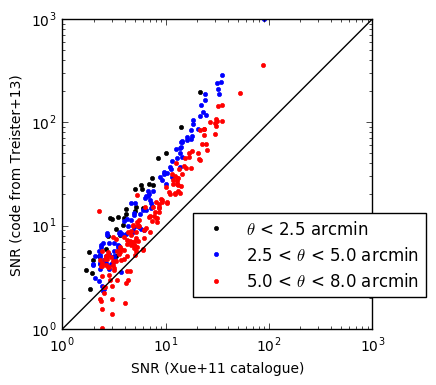

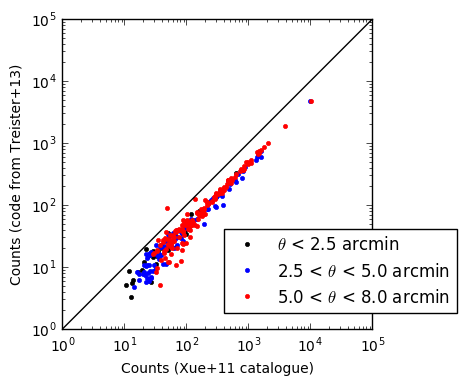

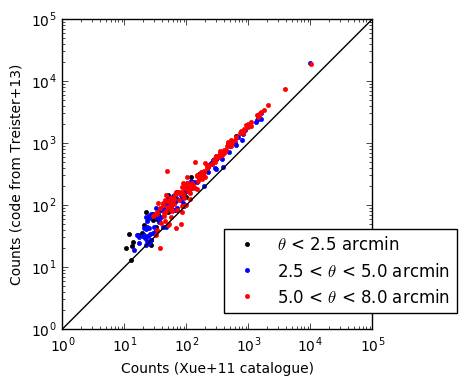

In [7]:
f=plt.figure()
ax=f.add_subplot(111)
ax.plot(sn1,sn2,'k',ls='',marker='.',label='$\\theta$ < 2.5 arcmin')
ax.plot(sn3,sn4,'b',ls='',marker='.',label='2.5 < $\\theta$ < 5.0 arcmin')
ax.plot(sn5,sn6,'r',ls='',marker='.',label='5.0 < $\\theta$ < 8.0 arcmin')
ax.plot([1,1000],[1,1000],'k',ls='-',marker='')
plt.xscale('log')
plt.yscale('log')
ax.set_aspect('equal')
#plt.title('7 Ms sources (detected in 2-7keV)')
#plt.title('4 Ms sources (detected in 2-8keV)')
#plt.xlabel('SNR (Luo+17 catalogue)')
plt.xlabel('SNR (Xue+11 catalogue)')
plt.ylabel('SNR (code from Treister+13)')
plt.legend(numpoints=1, bbox_to_anchor=(1.2, 0.4))
plt.axis([1,1000,1,1000])
path = '/Users/justin/Documents/Master_Thesis/presentation/plots/treister/treister_stacking_snr_4ms.pdf'
plt.savefig(path, format='pdf', dpi=1000,bbox_inches='tight')

g=plt.figure()
ax2=g.add_subplot(111)
ax2.plot(c1,c2,'k',ls='',marker='.',label='$\\theta$ < 2.5 arcmin')
ax2.plot(c3,c4,'b',ls='',marker='.',label='2.5 < $\\theta$ < 5.0 arcmin')
ax2.plot(c5,c6,'r',ls='',marker='.',label='5.0 < $\\theta$ < 8.0 arcmin')
ax2.plot([1,100000],[1,100000],'k',ls='-',marker='')
plt.xscale('log')
plt.yscale('log')
ax2.set_aspect('equal')
#plt.title('7 Ms sources (detected in 2-7keV)')
#plt.title('4 Ms sources (detected in 2-8keV)')
#plt.xlabel('Counts (Luo+17 catalogue)')
plt.xlabel('Counts (Xue+11 catalogue)')
plt.ylabel('Counts (code from Treister+13)')
plt.legend(numpoints=1, bbox_to_anchor=(1.3, 0.35))
plt.axis([1,100000,1,100000])
path = '/Users/justin/Documents/Master_Thesis/presentation/plots/treister/treister_stacking_counts_4ms.pdf'
plt.savefig(path, format='pdf', dpi=1000,bbox_inches='tight')

g=plt.figure()
ax2=g.add_subplot(111)
ax2.plot(c1,c2tot,'k',ls='',marker='.',label='$\\theta$ < 2.5 arcmin')
ax2.plot(c3,c4tot,'b',ls='',marker='.',label='2.5 < $\\theta$ < 5.0 arcmin')
ax2.plot(c5,c6tot,'r',ls='',marker='.',label='5.0 < $\\theta$ < 8.0 arcmin')
ax2.plot([1,100000],[1,100000],'k',ls='-',marker='')
plt.xscale('log')
plt.yscale('log')
ax2.set_aspect('equal')
#plt.title('7 Ms sources (detected in 2-7keV)')
#plt.title('4 Ms sources (detected in 2-8keV)')
#plt.xlabel('Counts (Luo+17 catalogue)')
plt.xlabel('Counts (Xue+11 catalogue)')
plt.ylabel('Counts (code from Treister+13)')
plt.legend(numpoints=1, bbox_to_anchor=(1.3, 0.35))
plt.axis([1,100000,1,100000])
path = '/Users/justin/Documents/Master_Thesis/presentation/plots/treister/treister_stacking_totcounts_4ms.pdf'
plt.savefig(path, format='pdf', dpi=1000,bbox_inches='tight')